# Part 2: Image Classification with Deep Learning (40 Points)

## 1. Load the dataset Micro-Organism Image Classification dataset from the given link: https://www.kaggle.com/datasets/mdwaquarazam/microorganism-image-classification (2 points)
## This dataset comprises 789 images of 8 different classes, 75 images per class.

In [1]:
import sys, os
import pandas as pd
from collections import defaultdict

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

In [2]:
path = "/Users/hims/Downloads/Micro_Organism"

class_labels = sorted(list(filter(lambda x: not "DS_Store" in x, os.listdir(path))))

class_labels_dict = {}
for class_label in class_labels:
    instances = len(list(filter(lambda x: not "DS_Store" in x, os.listdir(f'{path}/{class_label}'))))
    class_labels_dict[class_label] = instances


df = pd.DataFrame(list(class_labels_dict.items()), columns=['Microorganism', 'Count'])
df.head(10)    

,Microorganism,Count
0,Amoeba,72
1,Euglena,168
2,Hydra,76
3,Paramecium,152
4,Rod_bacteria,85
5,Spherical_bacteria,86
6,Spiral_bacteria,75
7,Yeast,75


In [58]:
path = "/Users/hims/Downloads/Micro_Organism"

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
#     transforms.Resize((224, 224)),              # Resize images to a fixed size
    transforms.ToTensor(),                      # Convert PIL Image to tensor
    transforms.Normalize(mean, std)             # Normalize image tensor
])

In [4]:
class_names = dataset.classes
print("Number of Samples = ", len(dataset.samples))
print("classes = ", ", ".join(class_names))

Number of Samples =  789
classes =  Amoeba, Euglena, Hydra, Paramecium, Rod_bacteria, Spherical_bacteria, Spiral_bacteria, Yeast


## 2. Explain in your own words: (7 points)

* a. Gradient Descent (1 point)
* b. Drop out (1 point)
* c. Activation functions (1 point)
* d. Back Propagation (1 point)
* e. Epochs, Iterations, and Batch size (3 points)

# 3. Visualize/summarize the data (10 points)

* a. Number of entities in the training and testing set and number of classes in the target variable (1 point)
* b. Number of pixels in the image (Height and width individually) (2 points) 
* c. Number of images per class (1 point)
* d. Display at least 2 images of each class (6 points)

In [5]:
# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset))  # 80% of data for training
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

Train Data size = 631
Test Data Size = 158
Number of Classes in the dataset = 8
classes =  Amoeba, Euglena, Hydra, Paramecium, Rod_bacteria, Spherical_bacteria, Spiral_bacteria, Yeast


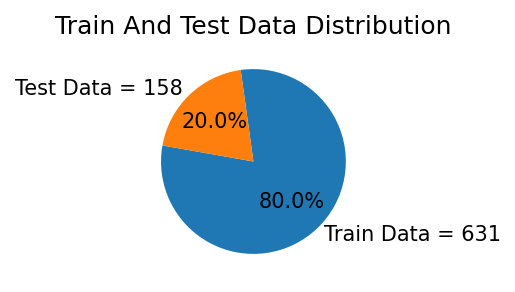

In [6]:
# Number of entities in the training and testing set and number of classes in the target variable (1 point)

print(f"Train Data size = {len(train_data)}")
print(f"Test Data Size = {len(test_data)}")
print(f"Number of Classes in the dataset = {len(dataset.classes)}")
print("classes = ", ", ".join(class_names))

# Create the pie chart
plt.figure(figsize=(2, 2), dpi=150)
plt.pie([len(train_data), len(test_data)], labels=[f"Train Data = {len(train_data)}", f"Test Data = {len(test_data)}"], autopct='%1.1f%%', startangle=170)
plt.title('Train And Test Data Distribution')
plt.show()

In [7]:
# Number of pixels in the image (Height and width individually) (2 points) 

min_height, min_width = float('inf'), float('inf')
max_height, max_width = float('-inf'), float('-inf')

for image, label in train_data:
    _, height, width = image.shape  
    min_height = min(min_height, height)
    min_width = min(min_width, width)
    max_height = max(max_height, height)
    max_width = max(max_width, width)

print(f"Minimum Height: {min_height}, Minimum Width: {min_width}")
print(f"Maximum Height: {max_height}, Maximum Width: {max_width}")


Minimum Height: 107, Minimum Width: 159
Maximum Height: 4701, Maximum Width: 4767


In [59]:
# so making the images to a standard size 
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image
])

dataset = ImageFolder(root=path, transform=transform)

image, label = dataset[0]
_, height, width = tuple(image.shape)
print("After transformation the New sizes are")

print(f"New Height: {height}")
print(f"New Height: {width}")

After transformation the New sizes are
New Height: 256
New Height: 256


In [60]:
# # Number of pixels in the image (Height and width individually) (2 points) 
# 
# min_height, min_width = float('inf'), float('inf')
# max_height, max_width = float('-inf'), float('-inf')
# 
# for image, label in dataset:
#     _, height, width = image.shape
#     min_height = min(min_height, height)
#     min_width = min(min_width, width)
#     max_height = max(max_height, height)
#     max_width = max(max_width, width)
# 
# print(f"Minimum Height: {min_height}, Minimum Width: {min_width}")
# print(f"Maximum Height: {max_height}, Maximum Width: {max_width}")


        Microorganism  Count
0              Amoeba     72
1             Euglena    168
2               Hydra     76
3          Paramecium    152
4        Rod_bacteria     85
5  Spherical_bacteria     86
6     Spiral_bacteria     75
7               Yeast     75


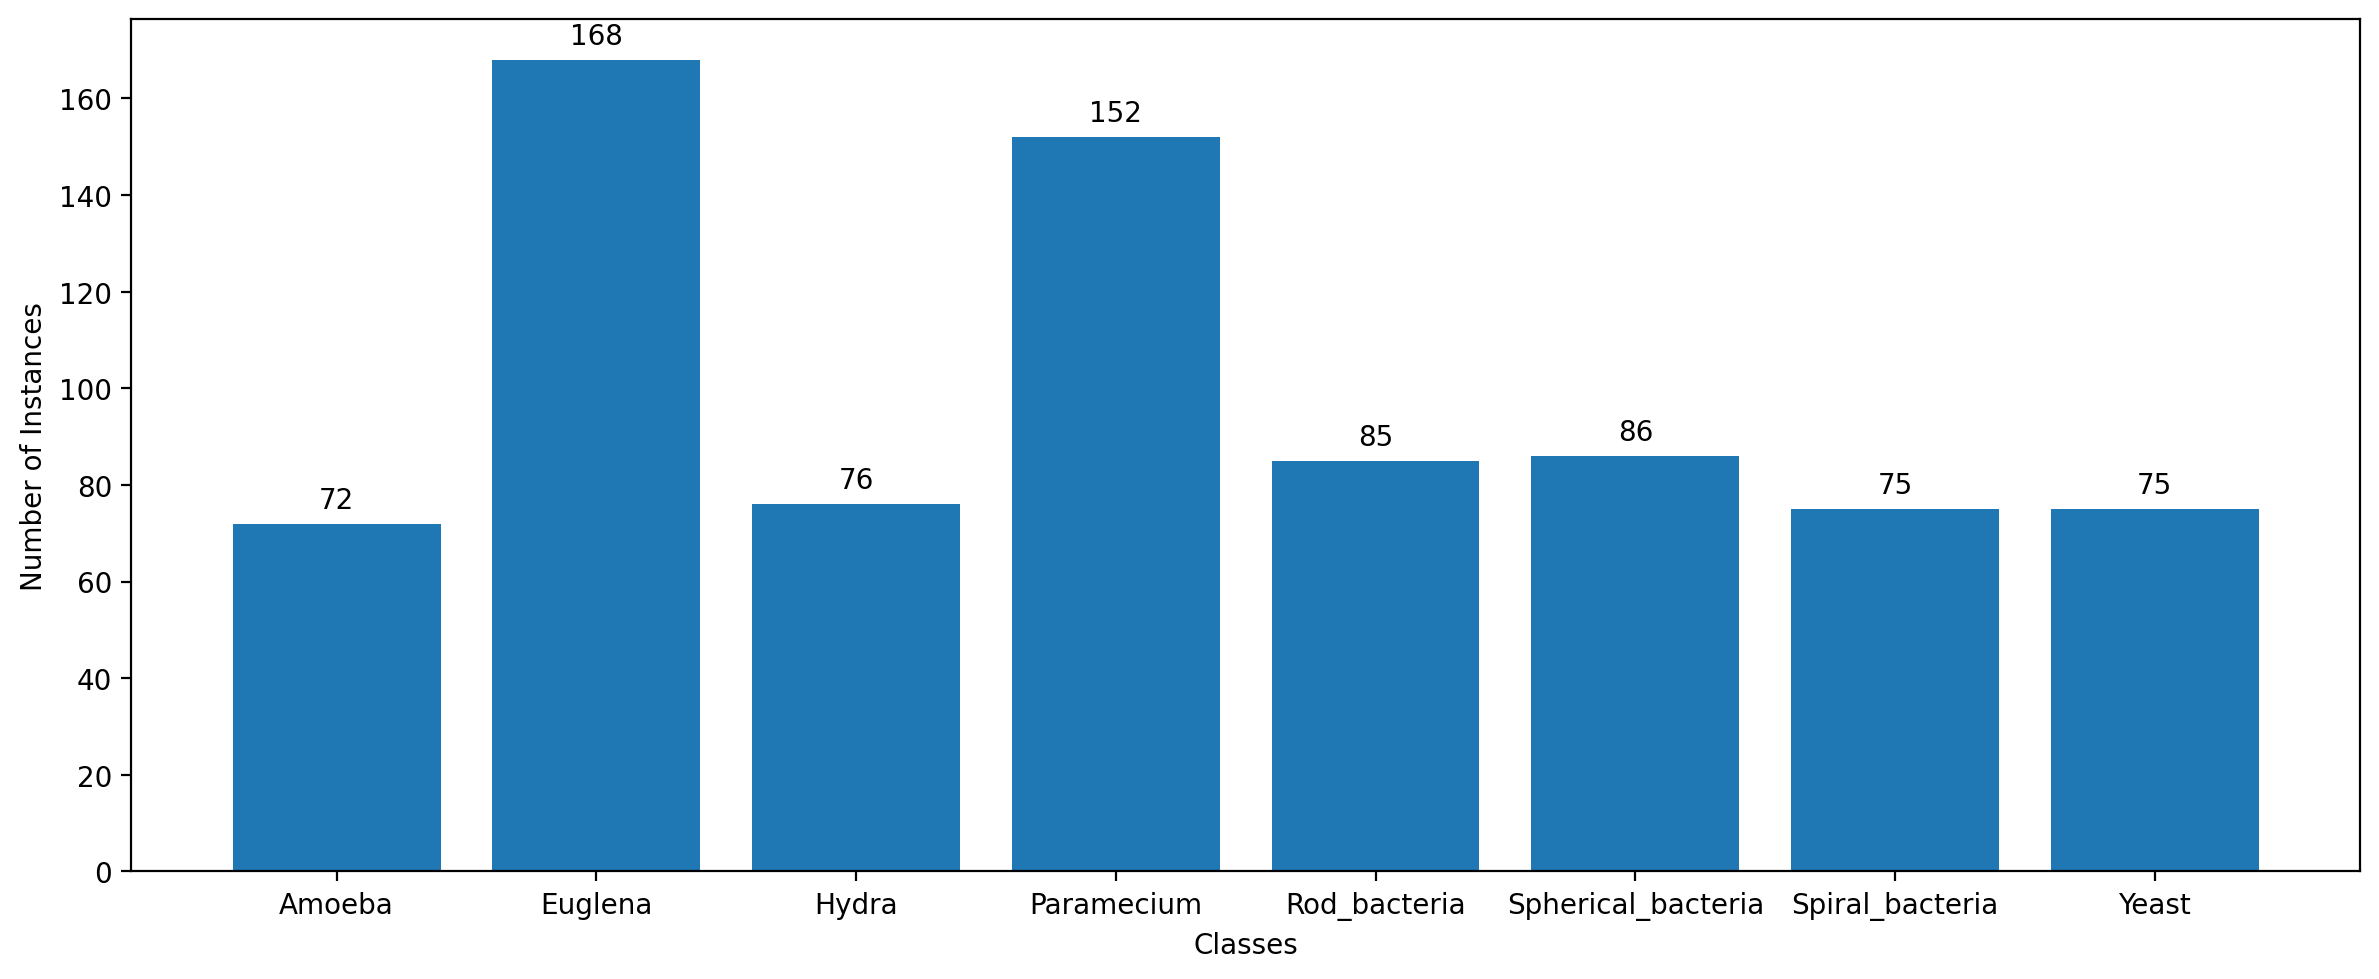

In [61]:
# Number of images per class (1 point)

def show_class_distribution(dataset):
    class_counts = defaultdict(int)
    for image, label in dataset:
        class_counts[class_names[label]] += 1

    df = pd.DataFrame(list(class_counts.items()), columns=['Microorganism', 'Count'])
    print(df.head(10))

    plt.figure(figsize=(12, 5), dpi=200)
    labels = sorted(class_counts.keys())
    counts = [class_counts[k] for k in sorted(class_counts.keys())]
    plt.bar(labels, counts)
    plt.xlabel('Classes')
    plt.ylabel('Number of Instances')
    plt.xticks(range(len(labels)), labels)
    for i, count in enumerate([class_counts[k] for k in sorted(class_counts.keys())]):
        plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()


show_class_distribution(dataset)

In [ ]:
# Display at least 2 images of each class (6 points)

import random


def display_images_per_class(dataset, num_images=2):
    class_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        class_indices[label].append(idx)

    # Display at least num_images images of each class
    fig, axes = plt.subplots(len(dataset.classes), num_images, figsize=(3*num_images, 3*len(dataset.classes)))
    for class_label, indices in class_indices.items():
        for i, idx in enumerate(random.sample(indices,num_images)):
            image, _ = dataset[idx]
            axes[class_label, i].imshow(image.permute(1, 2, 0).numpy())
            axes[class_label, i].axis('off')
            axes[class_label, i].set_title(f"Class {class_names[class_label]}")

    plt.tight_layout(pad=3.0)
    plt.show()

# Example usage with train_set (assuming train_set is your training dataset)
display_images_per_class(dataset, num_images=2)

# 4. Train a neural network (21 points)

* a. Decide the number of layers and neurons in each layer (2 points)
* b. Try out different activation functions (explain each one you used) (4 points)
* c. Try with and without using dropout (4 points)
* d. Try different regularizations apart from dropout (4 points)
* e. Try different optimization algorithms (such as Gradient Descent, Adam, etc.) (4 points)
* f. Create a graph of f1 score vs epochs for training and validation set. (2 points) g.
* Calculate the number of trainable parameters in your final model. (1 point)

In [130]:

# so making the images to a standard size 
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the image to 256x256
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=mean, std=std)  # Normalize the image
])

dataset = ImageFolder(root=path, transform=transform)

train_size = int(0.8 * len(dataset))  # 80% of data for training
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [131]:
# """
# Defining a model class which have a variable dropout and activation functions.
# So that we can measure the performance for each of the model
# """
# class MLP(nn.Module):
#     def __init__(self, activation_function, dropout):
#         super(MLP, self).__init__()
        
#         self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 output channels, 5x5 kernel
#         self.pool = nn.MaxPool2d(2, 2)  # 2x2 max pooling
#         self.conv2 = nn.Conv2d(6, 16, 5)  # 6 input channels, 16 output channels, 5x5 kernel
        
        
#         self.activation_function = activation_function
#         self.dropout = dropout
#         self.fc1 = nn.Linear(16 * 62 * 62, 256)
#         self.fc2 = nn.Linear(256, 128)
#         self.fc3 = nn.Linear(128, 8)
#         self.dropout_fuction = nn.Dropout(p=dropout)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))

#         x = x.view(-1, 16 * 62 * 62)
#         x = self.activation_function(self.fc1(x))
#         x = self.dropout_fuction(x)
#         x = self.activation_function(self.fc2(x))
#         x = self.dropout_fuction(x)
#         x = self.fc3(x)
#         return x


In [132]:
class CNNModel(nn.Module):
    """
    Creating A simple CNN which will take sample input data size and the expected number of output classes.
    """
    def __init__(self, num_classes, img_height, img_width, dropout=0.2):
        super(CNNModel, self).__init__()
        self.rescaling = nn.Sequential(
            nn.Conv2d(3, 3, kernel_size=1),
            nn.BatchNorm2d(3),
            nn.ReLU(inplace=True)
        )
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * (img_height // 8) * (img_width // 8), 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, num_classes)
        
        self.dropout_fuction = nn.Dropout(p=dropout)
        

    def forward(self, x):
        x = self.rescaling(x)
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout_fuction(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout_fuction(x)
        x = nn.functional.relu(self.fc3(x))
        x = self.dropout_fuction(x)
        x = self.fc4(x)
        return x


Epoch 1, Loss: 0.8257212042808533, trainAccuracy=89.22345483359746, testAccuracy=25.949367088607595
Epoch 2, Loss: 0.6092194233621869, trainAccuracy=93.50237717908082, testAccuracy=30.37974683544304
Epoch 3, Loss: 0.4160662974630083, trainAccuracy=95.56259904912837, testAccuracy=30.37974683544304
Epoch 4, Loss: 0.3499642482825688, trainAccuracy=96.19651347068145, testAccuracy=29.746835443037973
Epoch 5, Loss: 0.24247111805847713, trainAccuracy=94.92868462757528, testAccuracy=31.645569620253166
Epoch 6, Loss: 0.23845856956073216, trainAccuracy=97.30586370839937, testAccuracy=33.54430379746836
Epoch 7, Loss: 0.14737205845969065, trainAccuracy=97.93977812995246, testAccuracy=34.177215189873415
Epoch 8, Loss: 0.16776080855301448, trainAccuracy=97.30586370839937, testAccuracy=30.37974683544304
Epoch 9, Loss: 0.18813576229981013, trainAccuracy=98.57369255150554, testAccuracy=32.91139240506329
Epoch 10, Loss: 0.15548284138951982, trainAccuracy=98.57369255150554, testAccuracy=27.84810126582278

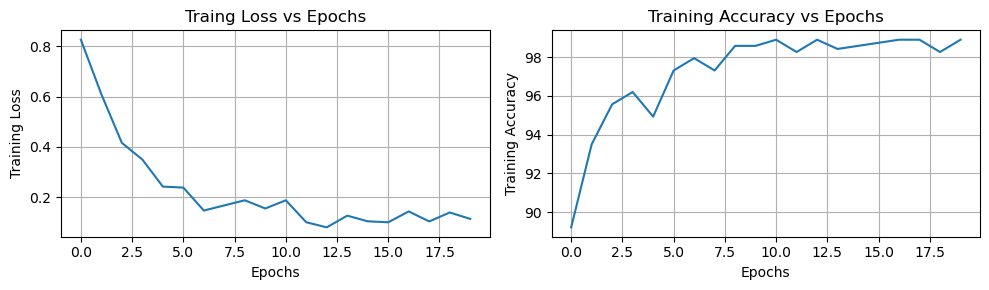

Finished Training with loss = 0.114204
Accuracy on Train Data  = 98.891%
Accuracy on Test Data:  29.114%


In [129]:
import matplotlib.pyplot as plt
 
def plot_training_metrics(losses, accuracies):
    """
        Plot the traning metrics
    """
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))

    axs[0].plot(losses)
    axs[0].set_title('Traing Loss vs Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Training Loss')
    axs[0].grid(True)

    axs[1].plot(accuracies)
    axs[1].set_title('Training Accuracy vs Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Training Accuracy')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    
def evaluation(model, test_data):
    """
    Evaluate the model with test data
    """
    model.eval()
    predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())  # Store predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return (correct / total * 100), predictions # correct, total, predictions


def training(train_loader, num_epochs, model, criterion, optimizer, verbose=0):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        train_loader = training data
        model = base model
        epocs  = number of iteration the moedls will be trained
        optmizer =  'adam' or 'SGD'
        criterion = which used to evaluate the model
        verbose = to control logs
    """
    losses, train_accuracies, test_accuracies = [], [], []

    running_loss = 0.0
    for epoch in range(num_epochs):
        
        epoch_loss, epoch_accuracy = 0, 0
        model.train()
        running_loss = 0.0
        if verbose == 0:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1} ------------------------')
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            
            # forward pass
            outputs = model(inputs)
#             print(outputs)
#             labels_onehot = nn.functional.one_hot(labels, num_classes=8).float()  # Convert labels to one-hot encoding
#             loss = criterion(outputs, labels_onehot)
            loss = criterion(outputs, labels)
    
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            
            running_loss += loss.item()
            if verbose == 0 and i % 100 == 99:  # print every 100 mini-batches
                print(f'\tEpoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / len(train_loader)}')
                running_loss = 0.0
            
        losses.append(epoch_loss/ len(train_loader))
        trainAccuracy, preds = evaluation(model=model, test_data=train_loader)
        train_accuracies.append(trainAccuracy)
        testAccuracy, _ = evaluation(model=model, test_data=test_loader)
        if verbose == 1:
            print(f'Epoch {epoch + 1}, Loss: {running_loss/len(train_loader)}, {trainAccuracy=}, {testAccuracy=}')
        

    if verbose:
        plot_training_metrics(losses, train_accuracies) 
        
    print(f'Finished Training with loss = {running_loss / len(train_loader) :.6}')
    print(f'Accuracy on Train Data  = {trainAccuracy :.5}%')
    return model, running_loss/100, train_accuracies[-1]




model = CNNModel(8, 256, 256)
model, training_loss, train_accuracy = training(train_loader = train_loader,
                                                num_epochs = 20,
                                                model = model,
                                                criterion = nn.CrossEntropyLoss(),
                                                optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001),
                                                verbose = 1)
test_accuracy, predictions = evaluation(model=model, test_data=test_loader)
print(f'Accuracy on Test Data: {test_accuracy: .5}%')


	Training optimizer=Adam,loss=CrossEntropyLoss,activation=ReLU,dropout=0.0


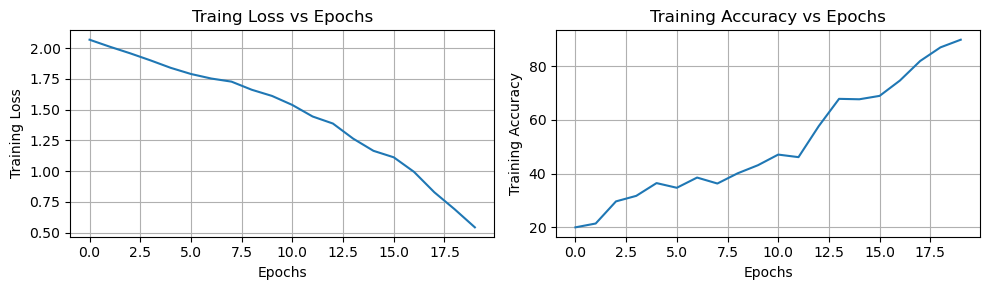

Finished Training with loss = 0.543034
Accuracy on Train Data  = 89.857%
Accuracy on Test Data:  34.81%

	Training optimizer=SGD,loss=CrossEntropyLoss,activation=ReLU,dropout=0.0


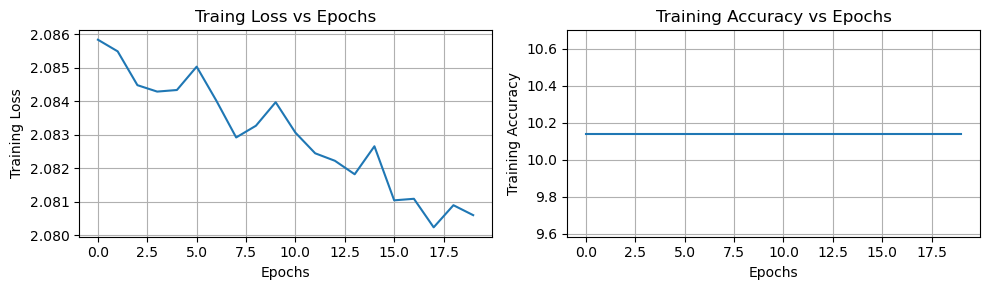

Finished Training with loss = 2.0806
Accuracy on Train Data  = 10.143%
Accuracy on Test Data:  7.5949%


In [133]:
optimizers = [optim.Adam, optim.SGD]#, optim.RMSprop]
loss_functions = [ nn.CrossEntropyLoss()]#, nn.MSELoss()]
dropouts = [0.0]#, 0.2, 0.5]
activation_functions = [nn.ReLU()]#, nn.Sigmoid()]

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "test_accuracy": [], "train_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer.__name__)
                result["loss"].append(loss_function.__class__.__name__)
                result["activation"].append(activation_function.__class__.__name__)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

#                 model = MLP(activation_function=activation_function, dropout=dropout)
                model = CNNModel(8, 256, 256)
                model, training_loss, train_accuracy = training(train_loader = train_loader,
                                                                num_epochs = 20,
                                                                model = model,
                                                                criterion = loss_function,
                                                                optimizer = optimizer(model.parameters(), lr=0.001, weight_decay=0.001),
                                                                verbose = 2)

                result["training_loss"].append(training_loss)
                result["train_accuracy"].append(train_accuracy)

                test_accuracy, predictions = evaluation(model=model, test_data=test_loader)
                print(f'Accuracy on Test Data: {test_accuracy: .5}%')
                result["test_accuracy"].append(test_accuracy)


In [72]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,training_loss,test_accuracy,train_accuracy,name
0,Adam,CrossEntropyLoss,0.0,ReLU,0.013986,31.012658,97.622821,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
1,SGD,CrossEntropyLoss,0.0,ReLU,0.413111,19.620253,21.711569,"optimizer=SGD,loss=CrossEntropyLoss,activation..."


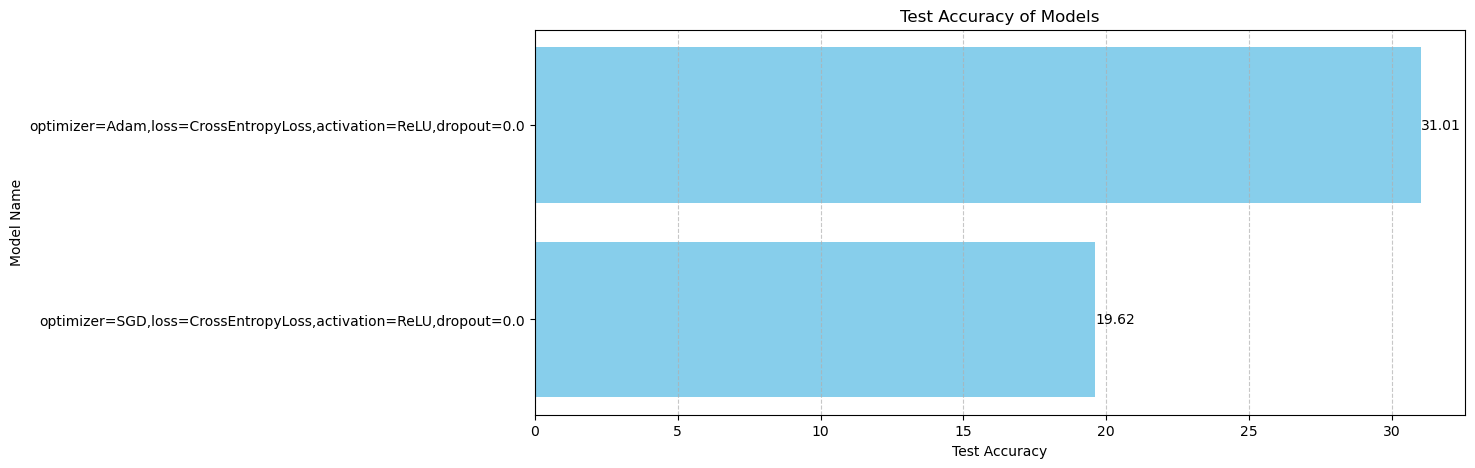

In [73]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='test_accuracy')

plt.figure(figsize=(12, 5))
bars = plt.barh(df_sorted['name'], df_sorted['test_accuracy'], color='skyblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()